In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from baseline.coref_resolution import *

/home/sarthakj/miniconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
vec, X, y, pairs = generate_data('../model_data/pwc_split_on_labeled/train.jsonl', 
                                '../model_data/pwc_split_on_labeled/dev.jsonl', 
                                '../model_data/pwc_split_on_labeled/test.jsonl')

2019-09-21 15:18:02,001:INFO:Starting ...
2019-09-21 15:18:14,414:INFO:Done loading data 
100%|██████████| 273084/273084 [00:28<00:00, 9734.00it/s] 
2019-09-21 15:21:46,389:INFO:Generate Features ...
2019-09-21 15:21:54,898:INFO:Vectorized Features ..


In [13]:
from sklearn.linear_model import LogisticRegressionCV
# from yellowbrick.classifier import DiscriminationThreshold

ModuleNotFoundError: No module named 'yellowbrick'

In [14]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    lr = LogisticRegressionCV(class_weight="balanced", penalty="l2", scoring="f1", cv=5)
    lr.fit(X["train"], y["train"])

logging.info("Fitted Logistic Regression ..")

pred = lr.predict(X["dev"])

2019-09-21 15:30:13,687:INFO:Fitted Logistic Regression ..


In [15]:
pred_prob = lr.predict_proba(X["dev"])

In [16]:
from dygie.training.thresholding_f1_metric import *

2019-09-21 15:30:45,135:INFO:instantiating registered subclass relu of <class 'allennlp.nn.activations.Activation'>
2019-09-21 15:30:45,137:INFO:instantiating registered subclass relu of <class 'allennlp.nn.activations.Activation'>
2019-09-21 15:30:45,138:INFO:instantiating registered subclass relu of <class 'allennlp.nn.activations.Activation'>
2019-09-21 15:30:45,140:INFO:instantiating registered subclass relu of <class 'allennlp.nn.activations.Activation'>


In [17]:
metric = BinaryThresholdF1(bins=100)

In [18]:
import torch

In [19]:
p = torch.Tensor([pred_prob[:, 1]])
g = torch.Tensor(np.array([y["dev"]]))

In [20]:
metric(p, g)

In [21]:
precision = f1_metric._prf_divide(metric.matched_counts, metric.predicted_counts)
recall = f1_metric._prf_divide(metric.matched_counts, metric.total_counts)
f1 = f1_metric._prf_divide(2*precision*recall , (precision + recall))

NameError: name 'f1_metric' is not defined

In [22]:
metric.get_metric(reset=False)

{'total_gold': 16882.0,
 'total_predicted': 16861.0,
 'total_matched': 12998.0,
 'precision': 77.08914062036652,
 'recall': 76.99324724558701,
 'f1': 77.04116409329343,
 'threshold': 0.6965757575757576}

In [27]:
plt.plot(precision)
plt.plot(recall)
plt.plot(f1)
plt.show()

NameError: name 'precision' is not defined

In [24]:
np.abs(precision - recall)

NameError: name 'precision' is not defined

In [25]:
import matplotlib.pyplot as plt
import numpy as np

2019-09-21 15:31:03,058:DEBUG:CACHEDIR=/home/sarthakj/.cache/matplotlib
2019-09-21 15:31:03,060:DEBUG:Using fontManager instance from /home/sarthakj/.cache/matplotlib/fontlist-v310.json
2019-09-21 15:31:03,146:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-09-21 15:31:03,151:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [26]:
from sklearn.metrics import *
from tqdm import tqdm

In [28]:
precision, recall, f1 = [], [], []
pred_prob = lr.predict_proba(X['dev'])
for t in tqdm(np.linspace(0, 1, 100)) :
    pred = np.where(pred_prob[:, 1] > t, 1, 0)
    p, r, f, s = precision_recall_fscore_support(y['dev'], pred, average='binary')
    precision.append(p)
    recall.append(r)
    f1.append(f)

 98%|█████████▊| 98/100 [00:05<00:00, 17.20it/s]/home/sarthakj/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
100%|██████████| 100/100 [00:06<00:00, 17.20it/s]


2019-09-21 15:31:17,518:DEBUG:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2019-09-21 15:31:17,519:DEBUG:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2019-09-21 15:31:17,520:DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2019-09-21 15:31:17,521:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-09-21 15:31:17,521:DEBUG:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2019-09-21 15:31:17,522:DEBUG:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2019-09-21 15:31:17,524:DEBUG:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2019-09-21 15:31:17,525:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold

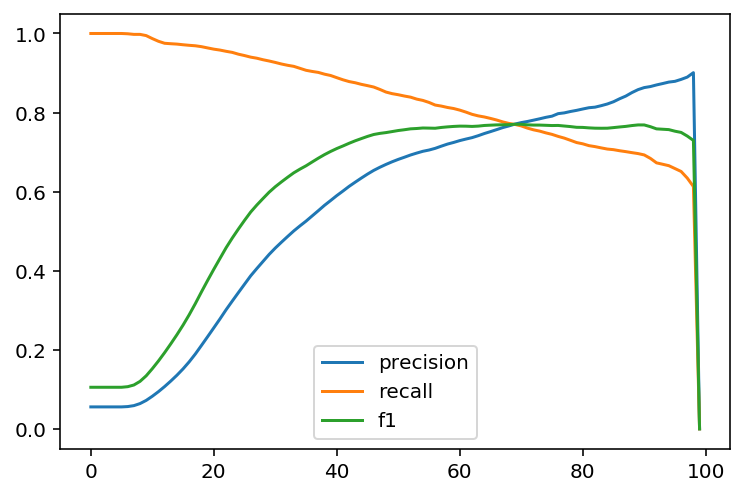

In [29]:
plt.plot(precision, label="precision")
plt.plot(recall, label="recall")
plt.plot(f1, label="f1")
plt.legend()
plt.show()

In [30]:
fpr, tpr, thresholds = roc_curve(y["dev"], pred_prob[:, 1])

2019-09-21 15:31:24,886:DEBUG:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2019-09-21 15:31:24,888:DEBUG:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2019-09-21 15:31:24,889:DEBUG:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2019-09-21 15:31:24,890:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-09-21 15:31:24,891:DEBUG:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2019-09-21 15:31:24,892:DEBUG:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2019-09-21 15:31:24,893:DEBUG:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2019-09-21 15:31:24,894:DEBUG:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold

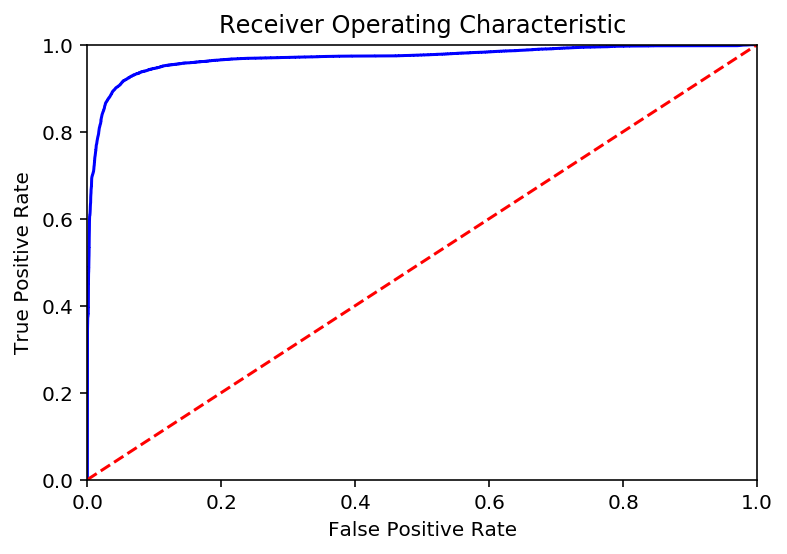

In [31]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
# plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
optimal_idx = np.argmax(tpr + (1 - fpr))
optimal_threshold = thresholds[optimal_idx]

In [33]:
optimal_threshold

0.333236657277036

In [34]:
tpr - fpr

array([0.00000000e+00, 5.92346878e-05, 2.85511195e-02, ...,
       6.95908752e-05, 4.52340689e-05, 0.00000000e+00])

In [ ]:
print(classification_report(y["dev"], pred_prob[:, 1] > 0.7))

In [ ]:
precision, recall, _ = precision_recall_curve(y['dev'], pred_prob[:, 1])
from inspect import signature

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [ ]:
import numpy.ma as ma

In [ ]:
a = ma.array(np.array([1, 2, 3]), mask=[0, 1, 0])
b = ma.array(np.array([2, 10, 100]), mask=[0, 0, 1])

In [ ]:
np.argmin(a/b)

In [ ]:
a/b

In [ ]:
from dygie.data.dataset_readers.entity_linking_reader import PwCLinkerReader

In [ ]:
pairs = PwCLinkerReader.generate_pairs('../data/pwc_split_on_labeled/dev.jsonl')

In [ ]:
f = open('../data/pwc_split_on_labeled/dev_entity_pairs.jsonl', 'w')
import json
for p in pairs :
    f.write(json.dumps({"premise" : p[0], "hypothesis": p[1], "label" : p[2]}) + '\n')
f.close()

In [ ]:
predictions = [json.loads(line) for 
               line in open('../outputs/pwc_outputs/experiment_linker/train_sampled/20190806-202943/dev_predict.jsonl')]

In [ ]:
pred_labels = [x['label'] for x in predictions]

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix([1 if x[2] == 'Entailment' else 0 for x in pairs], pred_labels).ravel()

In [ ]:
examples = {(p, g):[] for p in range(2) for g in range(2)}

In [ ]:
for i in range(len(pairs)) :
    p = pred_labels[i]
    g = 1 if pairs[i][2] == 'Entailment' else 0
    examples[(p, g)].append(pairs[i])

In [ ]:
for i in range(len(examples[(1,1)])) : 
    e = examples[(1, 1)][i]
    if 'stanford' in e[0].lower() or 'stanford' in e[1].lower() :
        print(examples[(1, 1)][i])